# Weather Notebook

***
This notebook analysis the weatherreadings csv file in the data folder of this repository. In specific we are analysing the temperature over time. (dryBulbTemperature_Celcius). Pandas has being used to read in the dataset.


![weather](https://www.bigcountryhomepage.com/wp-content/uploads/sites/56/2020/02/Weather-v2.jpg?w=640&h=360&crop=1)


### Description of Assignment

***

### **Tasks**

Task 1: Commit something to your assignment repository this week (anything)

Task 2: I have put a CSV file in a assignment folder in the PFDA-courseware repository

Create a jupyter notebook called `assignment2-weather.ipynb` that has a nice plot of the temperature over time 
`( "dryBulbTemperature_Celsius" )`. 

**Marks will be give for:**

1. Completing the assignment
1. How nice the plot looks
You may use PANDAS if you wish to read in the data

### Import the Libraries

***

We use [pandas](https://pandas.pydata.org/) for the DataFrame data structure. It allows us to investigate CSV files, amongst other features. 
Pandas is a software library written for the Python programming language, which is used for data manipulation and analysis.

We use [NumPy](https://numpy.org/), which is a library for the Python programming language, which allows us to work with large 
multi-dimensional arrays and matrices. It also supplies a large collection of high-level mathematical functions to operate on these arrays. 
[NumPy Wikipedia](https://en.wikipedia.org/wiki/NumPy)

We use [matplotlib](https://matplotlib.org/), which is a plotting library for the Python programming language, and is usually used in 
conjunction with its numerical mathematics extension NumPy.


In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from geopy.geocoders import Nominatim


### Load the dataset

***

The data file has being downloaded from the URL given above and stored in the Data_Files folder in this repository. We are just using the `dryBulbTemperature` and the `reportStartDateTime` columns for our plot, so these are the only columns we are going to use in our dataframe. 


### Data manipulation
***


Display the first 5 rows of the dataset using the `df.head()` function, and check the datafram dimensionally with the `df.info()` funtion.

In [ ]:
# Load the dataset. I have stored the dataset in a folder called data in this repository
df = pd.read_csv('data/weatherreadings1.csv', usecols = ['reportStartDateTime','dryBulbTemperature_Celsius'])


In [3]:
#Display the first 5 rows of the dataset
df.head()

,reportStartDateTime,dryBulbTemperature_Celsius
0,2024-10-02T16:15:00+00:00,15.944444
1,2024-10-02T16:45:00+00:00,15.777778
2,2024-10-02T17:00:00+00:00,15.111111
3,2024-10-02T17:15:00+00:00,14.277778
4,2024-10-02T17:30:00+00:00,13.666667


In [14]:
#Find out what type of data is in the dataset, the number of missing values and the data types it contains
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2024-10-02 16:15:00 to 2024-10-03 15:00:00
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dryBulbTemperature_Celsius  89 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


### Convert 'reportStartDateTime' column to datetime object and set it as the index column
***

Here we are using the pandas `to_datetime()` method to convert the `reportStartDateTime` column above from an object into datetime objects so that we can use the set our index to be a time series and simplify our plotting. We needed to reference the first 5 rows of the dataset as displayed above to work out the format that we needed so that we could seemlessly convert this column to a datetime object. As shown below this format was worked out as `%Y-%m-%dT%H:%M:%S+00:00`, which matches how the data is represented above

Some of the most popular formatting options are given in the table below. For example, to format the weekday as the abbreviated weekday name (Mon, Tue, Wed etc) the format sequence %a is used. To format the weekday as locale's full name (Monday, Tuesday, Wednesday etc) the format sequence %A is used. To format the weekday as a number %w is used, where 0 is Sunday and 6 is Saturday.   

|Directive | Meaning |
| --- | --- |
| `%a` | Weekday as locale's abbreviated name |
| `%A` | Weekday as locale's full name |
| `%w` | Weekday as decimal number, where 0 is Sunday and 6 is Saturday |
| `%d` | Day of the month as a zero-padded decimal number [01, 02, ..., 30, 31] |
| `%b` | Month as locale's abbreviated name |
| `%B` | Weekday as locale's full name |
| `%m` | Month as zero-padded decimal number [01, 02, ..., 11, 12] |
| `%y` | Year without century as a zero-padded decimal number name [0001, ..., 2019, 2020, ..., 9999] |
| `%Y` | Year with century as a decimal number  |
| `%H` | Hour (24-hour clock) as a zero-padded decimal number [00, 01, ..., 22, 23] |
| `%I` | Hour (12-hour clock) as a zero-padded decimal number |
| `%p` | Locale equivalent of either AM or PM |
| `%M` | Minute as a zero-padded decimal number [00, 01, ..., 58, 59]|
| `%S` | Second as a zero-padded decimal number [00, 01, ..., 58, 59]|
| `%f` | Microsecond as a zero-padded decimal number |
| `%j` | Day of the year as a zero-padded decimal number |
| `%W` | Week number of the year (Monday as the first day of the week) as a decimal number |
| `%U` | Week number of the year (Sunday as the first day of the week) as a decimal number |
| `%c` | Locale’s appropriate date and time representation |
| `%Z` | Time zone name |
| `%z` | UTC offset in the form HH[SS[.fffff]] |



In [ ]:
#Convert the reportStartDateTime to a datetime object
df['reportStartDateTime'] = pd.to_datetime(df['reportStartDateTime'], format='%Y-%m-%dT%H:%M:%S+00:00')
print(df['reportStartDateTime'].head())

#Convert the reportStartDateTime to the index column of the dataset so we can perform time series analysis
df.set_index('reportStartDateTime', inplace=True)
print(df.head())

0   2024-10-02 16:15:00
1   2024-10-02 16:45:00
2   2024-10-02 17:00:00
3   2024-10-02 17:15:00
4   2024-10-02 17:30:00
Name: reportStartDateTime, dtype: datetime64[ns]
                     dryBulbTemperature_Celsius
reportStartDateTime                            
2024-10-02 16:15:00                   15.944444
2024-10-02 16:45:00                   15.777778
2024-10-02 17:00:00                   15.111111
2024-10-02 17:15:00                   14.277778
2024-10-02 17:30:00                   13.666667


### Drybulb Temperature.

***

The drybulb temperature is the air temperature and is measured by a thermometer that is affected by the moisture content of the air.The Dry Bulb temperature is the air property that is most common used. When people refer to the temperature of the air, they are normally referring to its dry bulb temperature.

Contrast this to the wetbulb temperature which is the lowest temperature that air can cool to when water evaporates into it. This is measured using a thermometer with its bulb wrapped in wet muslin exposed to the airflow. The wet-bulb temperature is always lower or equal to the drybulb temperature of the air. The wet and dry bulb temperatures are only identical when the relative humidity is 100%, when the air is fully saturated.

More information on these can be found at this [link](https://www.weather.gov/source/zhu/ZHU_Training_Page/definitions/dry_wet_bulb_definition/dry_wet_bulb.html#:~:text=The%20wet%20bulb%20temperature%20is%20always%20lower%20than%20the%20drystate%20of%20the%20humid%20air.)

### Formatting the dates and times 
***

After much deliberation I decided to format the major and minor ticks using ``set_major_formatter()`` and ``set_minor_formatter()`` from the matplotlib dates library as below. Originally, I had used the dateutil class, but found the method used below much easier to understand and implement. The following resourse was very helpful for this method of formatting a time series plot in python using [matplotlib](https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/)

By using the `set_major_formatter()` and the `set_minor_formatter()` classes we again need to use format codes given above to format the date and time as shown below. Here we are using `%H:%M` to display the hour:minute, and `%d %b` to display the date and month. A full list of format codes can be found at this [location](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).


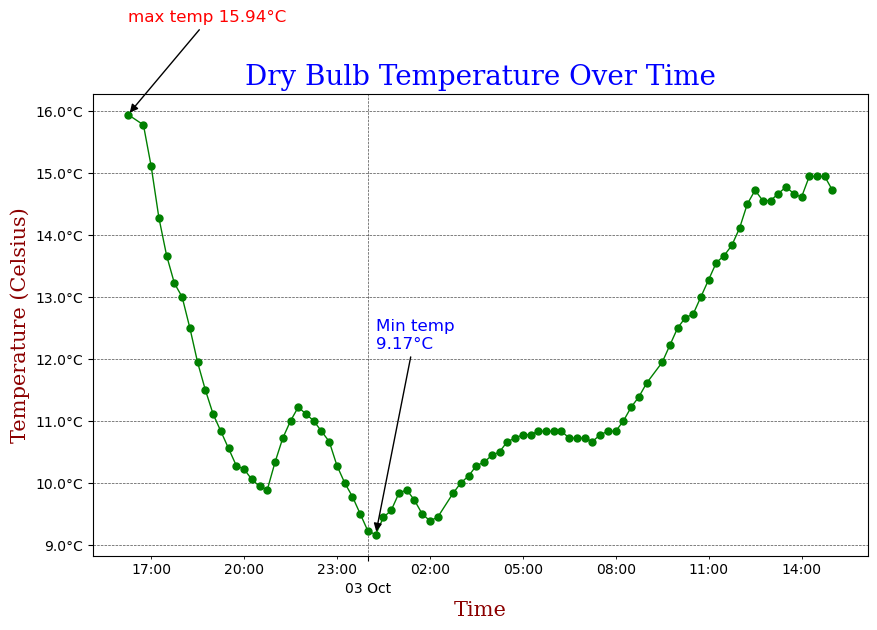

In [ ]:

#Create a variable to store the drybulb temperature column of the dataset and the datetime index
drybulb = df['dryBulbTemperature_Celsius']
datetime = df.index

#Set the font style and size for the title and labels
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Create a function to format the temperature values on the y-axis
def temperature_formatter(drybulb, pos):
    s = f"{drybulb}\N{DEGREE SIGN}C"
    return s

#Get the maximum and minimum temperatures in the dataset and format to 2 decimal places
max = df["dryBulbTemperature_Celsius"].max()
max = round(max, 2) 

min = df["dryBulbTemperature_Celsius"].min()
min = round(min, 2)

#Get the time of the maximum and minimum temperatures. 
#idxmax() returns the index of the first occurrence of the maximum value/minimum value. 
#As the index is the datetime column, we can use the index to get the time of the maximum and minimum temperatures
max_time = df["dryBulbTemperature_Celsius"].idxmax()
min_time = df["dryBulbTemperature_Celsius"].idxmin()

#Create a plot to display the drybulb temperature column of the dataset over time
fig, ax = plt.subplots(figsize=(10, 6))

#Plot the drybulb temperature of the dataset over time
ax.plot(datetime, drybulb, color='green', marker='o', linestyle='-', linewidth=1, markersize=5)

#Set the title, x-axis label, and y-axis label of the plot
ax.set_title('Dry Bulb Temperature Over Time', fontdict = font1)
ax.set_xlabel('Time', fontdict = font2)
ax.set_ylabel('Temperature (Celsius)', fontdict = font2)


#Set the y-axis to display the temperature values in Celsius with the degree symbol as per the temperature_formatter function
ax.yaxis.set_major_formatter(temperature_formatter)

#Turn on minor ticks on x-axis
ax.tick_params(axis='x', which='minor', bottom=True)

#Set the minor ticks to every 3 hours
ax.xaxis.set_minor_locator(mdates.HourLocator(interval = 3)) 
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%S'))

#Set the major ticks to every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%d %b'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 1))

#Annotate the maximum temperature on the plot
ax.annotate(f'max temp {max}°C ', xy=(max_time, max), xytext=(max_time, max+1.5),
            arrowprops=dict(arrowstyle='-|>', facecolor='black'), fontsize=12, color='red')
#Annotate the minimum temperature
plt.annotate(f"Min temp\n{min}°C", xy=(min_time, min), xytext=(min_time, min + 3), 
             arrowprops=dict(arrowstyle='-|>', facecolor="black"),fontsize=12, color='blue')

# Add gridlines to the plot
ax.grid(linestyle='--', linewidth=0.5, color='black', alpha=0.7) # Add gridlines


# Display the plot
plt.show()

In [7]:
geolocator = Nominatim(user_agent="myapp")
location = geolocator.reverse("53.5244, -8.8545")

print(location)

62, Blackacre, Tuam, Tuam Municipal District, County Galway, Connacht, H54 V260, Éire / Ireland


### **References**

***
Reference 1: [Matplotlib Tickers](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Formatter)

Reference 2: [Pandas - to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

Reference 3: [Geeks for Geeks -Matplotlib dates formatter](https://www.geeksforgeeks.org/matplotlib-dates-dateformatter-class-in-python/)

Reference 4: [Pandas idxmax() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html)

Reference 5: [Customising annotations in matplotlib](https://python-graph-gallery.com/how-to-create-and-custom-arrows-matplotlib/)


## End